In [83]:
## Alway run this block first! 
%matplotlib inline
# coding=utf-8

## Imports
import sys
sys.path.extend(['/Users/Dim/Desktop/school_folder/masters_thesis/gitCodeRepo/codePython/collateralOptimizer/'])
import numpy as np
import pandas as pd
from cvxopt import matrix
from cvxopt import solvers
from sklearn.covariance import *
from rollingCovarianceEstimation import *
from quadraticProgrammingOptim import *

In [84]:
## Main
# Set path & get rolling covariance estimate (MLE only at this stage!)
filePath = '/Users/Dim/Desktop/school_folder/masters_thesis/gitCodeRepo/data/noStaleX_returnsData_20160825.csv'
winSize  = 160
rollObj  = getRollingCovariance(filePath=filePath, winSize=winSize)
r        = rollObj['rollCov']
df       = rollObj['df']

# Select rolling covariance matrices
s = r[df.index[range(winSize, df.shape[0], winSize)]]
print "#!# Done with data-prep #!#\n"

# Feed rolling covariance matrices into solver
bucket = pd.DataFrame(index=range(0, df.shape[1]), data=range(0, df.shape[1]), columns=['test'])
for item in s:
    container = runQuadOptimizer(r[item].as_matrix())
    fill      =  pd.DataFrame(data=container['xOptScaled'], columns=[item])
    bucket    = pd.concat([bucket, fill], axis=1)

bucket = bucket.drop('test', axis=1)
historicalWeights = bucket
historicalWeights.index = rollObj['df'].columns
del bucket


#!# Done with data-prep #!#

     pcost       dcost       gap    pres   dres
 0:  6.1898e-02 -3.8984e+01  4e+01  8e-17  2e+01
 1:  6.1398e-02 -5.6131e-01  6e-01  7e-16  3e-01
 2:  4.7478e-02 -6.3298e-02  1e-01  7e-16  5e-02
 3:  3.3198e-02 -1.0995e-02  4e-02  7e-16  1e-02
 4:  2.3676e-02 -5.5102e-03  3e-02  2e-15  2e-03
 5:  2.0292e-02  3.5498e-03  2e-02  4e-15  3e-18
 6:  1.8266e-02  1.5210e-02  3e-03  2e-15  3e-18
 7:  1.7567e-02  1.6982e-02  6e-04  1e-15  3e-18
 8:  1.7362e-02  1.7323e-02  4e-05  2e-15  3e-18
 9:  1.7343e-02  1.7340e-02  3e-06  3e-15  2e-18
10:  1.7341e-02  1.7341e-02  9e-08  2e-15  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3298e-01 -1.5882e+01  2e+01  3e-17  1e+01
 1:  1.2985e-01 -3.4140e-01  5e-01  3e-16  5e-01
 2:  9.1601e-02 -1.8135e-02  1e-01  3e-16  8e-02
 3:  6.2307e-02 -2.6570e-02  9e-02  1e-15  3e-02
 4:  5.1347e-02 -4.5056e-02  1e-01  2e-15  2e-17
 5:  4.0908e-02  1.8023e-02  2e-02  1e-15  1e-17
 6:  3.6384e-02  2

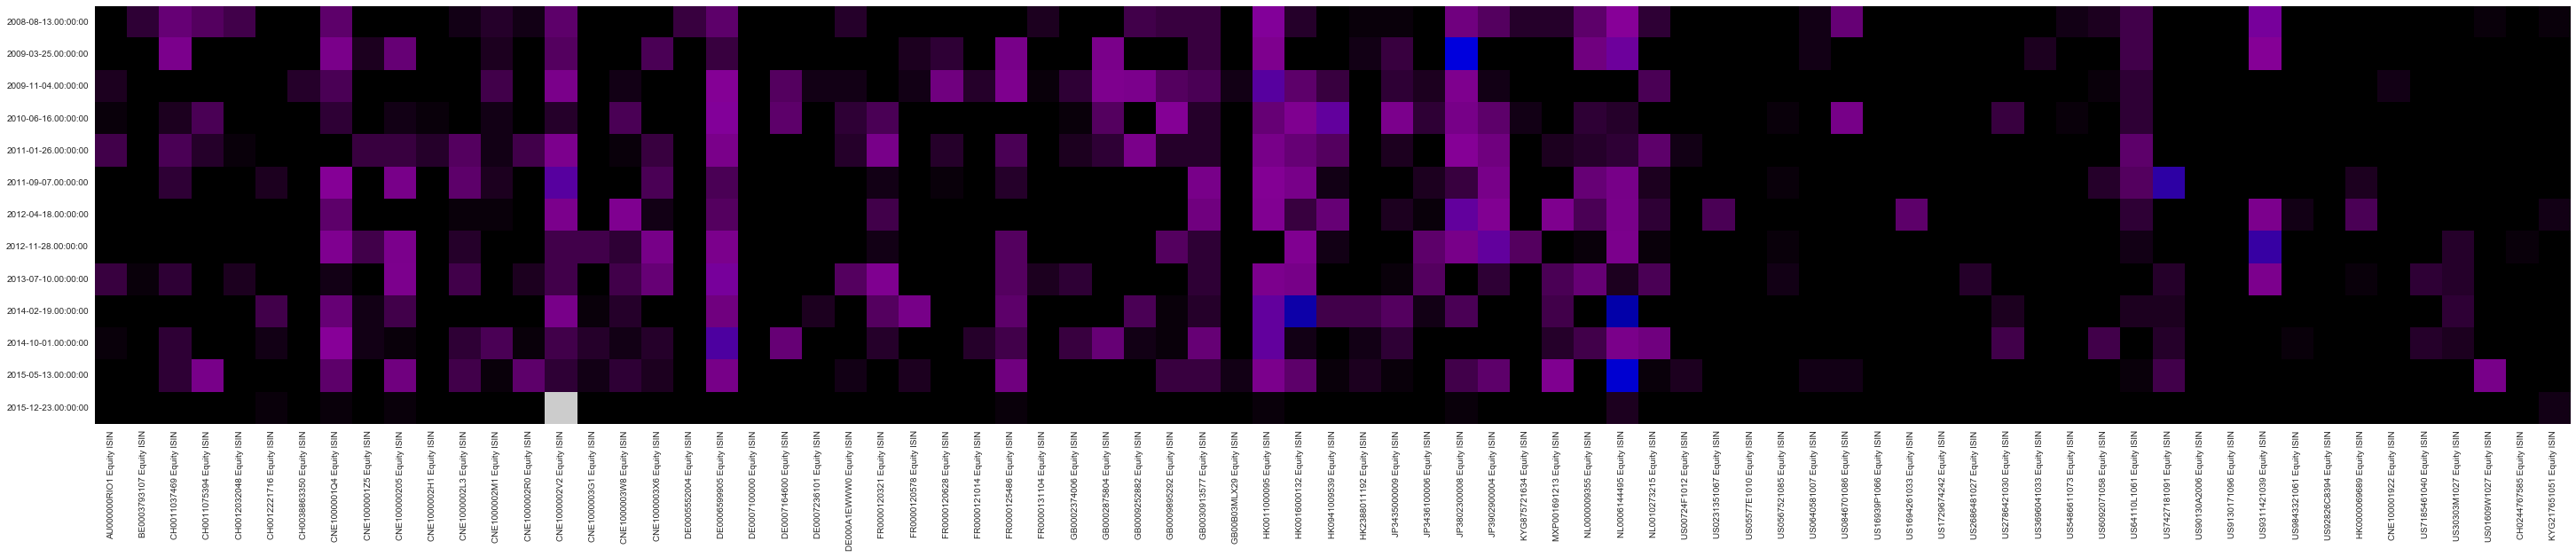

In [94]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from itertools import product
from string import ascii_uppercase
from matplotlib import patheffects

m, n = historicalWeights.shape[1], historicalWeights.shape[0] # 4 rows, 7 columns
df = historicalWeights.transpose()

fig, ax = plt.subplots(figsize=(50,80), dpi=300)
ax.imshow(df, interpolation='nearest', cmap=plt.cm.spectral).axes
_ = ax.set_xticks(np.linspace(0, n-1, n))
_ = ax.set_xticklabels(df.columns, rotation=90)
_ = ax.set_yticks(np.linspace(0, m-1, m))
_ = ax.set_yticklabels(df.index)

ax.grid('off')
plt.savefig("matrixPlot" 
            + "_rollingAssetWeights" + "_specs_m_" + str(m) + "_by_n_" + str(n)
            + "_" + datetime.datetime.strftime(datetime.datetime.now(), '%Y-%m-%d')
            + ".eps", format='eps', dpi=300, bbox_inches='tight')
#plt.show()



EllipticEnvelope	 EmpiricalCovariance	 GraphLasso	 GraphLassoCV	 LedoitWolf	 MinCovDet	 OAS	 ShrunkCovariance	 a	 
ascii_uppercase	 ax	 cax	 cbar	 container	 datetime	 df	 empirical_covariance	 fast_mcd	 
fig	 filePath	 fill	 flights	 flights_long	 getRollingCovariance	 graph_lasso	 historicalWeights	 im	 
img	 item	 ledoit_wolf	 ledoit_wolf_shrinkage	 log_likelihood	 m	 matrix	 n	 np	 
oas	 patheffects	 pd	 plt	 product	 r	 rollObj	 runQuadOptimizer	 s	 
shrunk_covariance	 sns	 solvers	 sys	 winSize	 


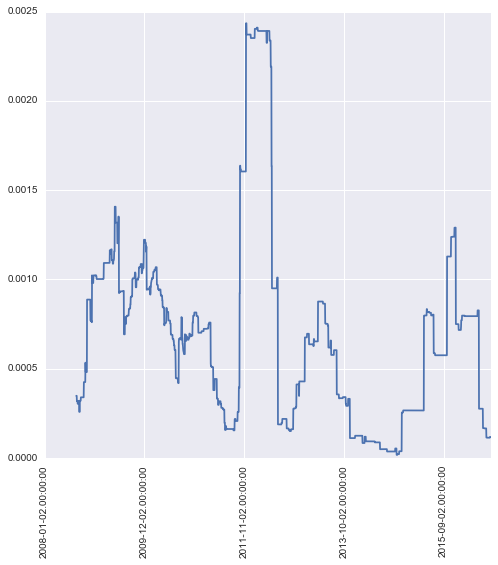

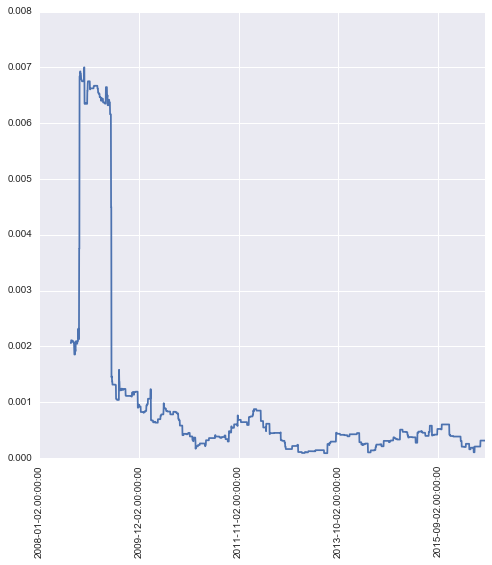

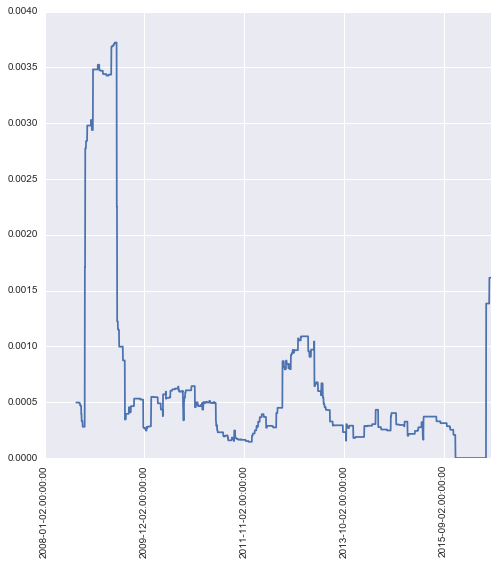

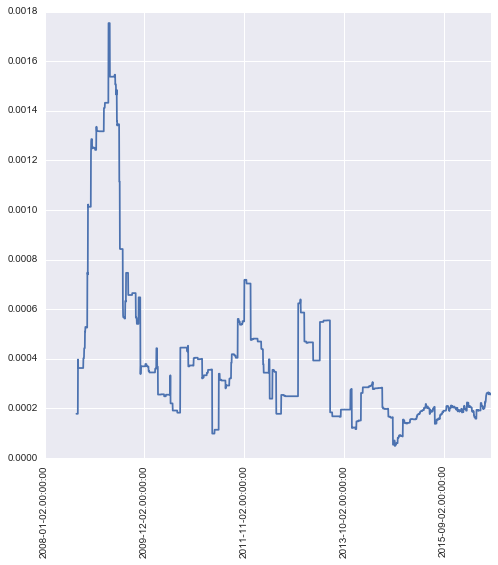

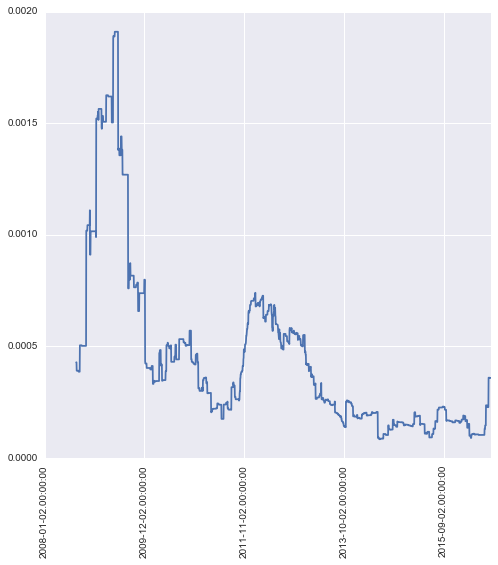

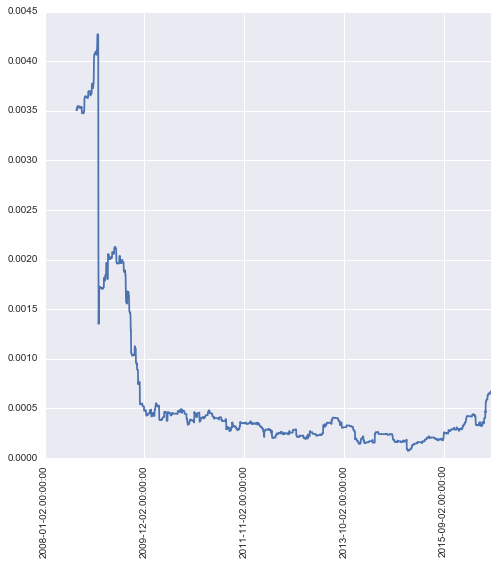

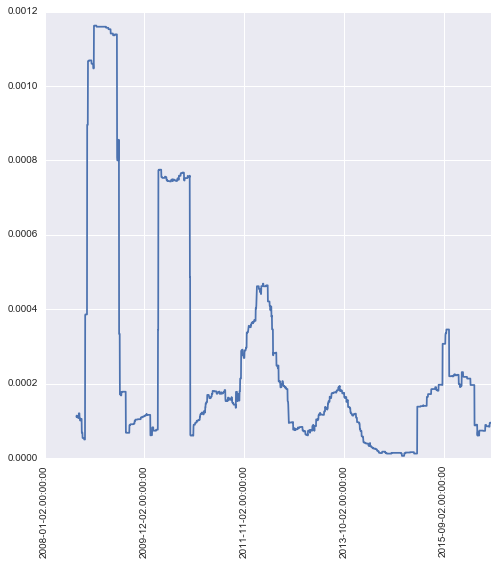

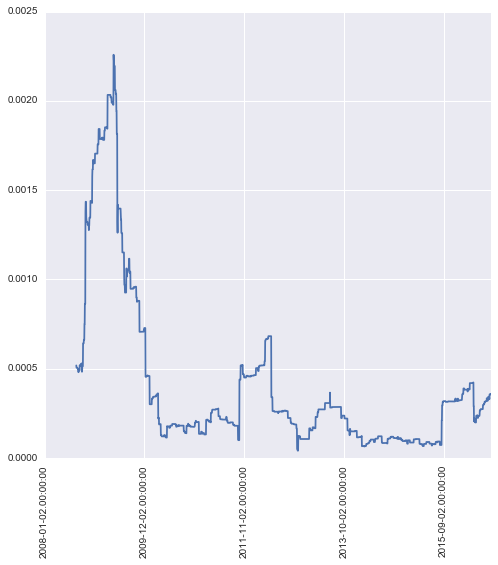

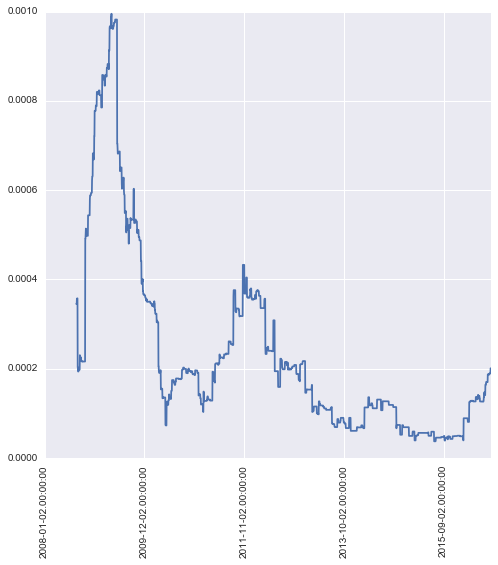

In [119]:
%who
listAssets = ['CNE1000001Q4 Equity ISIN', 'CNE100000205 Equity ISIN', 'CNE1000002V2 Equity ISIN', 'DE0006599905 Equity ISIN', 
 'FR0000125486 Equity ISIN', 'GB0030913577 Equity ISIN', 'HK0011000095 Equity ISIN', 'HK0016000132 Equity ISIN',
'NL0006144495 Equity ISIN']
for item in listAssets:
    rollObj['rollCov'].loc[:, item, item].plot(figsize=(8,8), rot=90); plt.show()






In [117]:
rollObj['rollCov'].axes[1]



Index([u'AU000000RIO1 Equity ISIN', u'BE0003793107 Equity ISIN',
       u'CH0011037469 Equity ISIN', u'CH0011075394 Equity ISIN',
       u'CH0012032048 Equity ISIN', u'CH0012221716 Equity ISIN',
       u'CH0038863350 Equity ISIN', u'CNE1000001Q4 Equity ISIN',
       u'CNE1000001Z5 Equity ISIN', u'CNE100000205 Equity ISIN',
       u'CNE1000002H1 Equity ISIN', u'CNE1000002L3 Equity ISIN',
       u'CNE1000002M1 Equity ISIN', u'CNE1000002R0 Equity ISIN',
       u'CNE1000002V2 Equity ISIN', u'CNE1000003G1 Equity ISIN',
       u'CNE1000003W8 Equity ISIN', u'CNE1000003X6 Equity ISIN',
       u'DE0005552004 Equity ISIN', u'DE0006599905 Equity ISIN',
       u'DE0007100000 Equity ISIN', u'DE0007164600 Equity ISIN',
       u'DE0007236101 Equity ISIN', u'DE000A1EWWW0 Equity ISIN',
       u'FR0000120321 Equity ISIN', u'FR0000120578 Equity ISIN',
       u'FR0000120628 Equity ISIN', u'FR0000121014 Equity ISIN',
       u'FR0000125486 Equity ISIN', u'FR0000131104 Equity ISIN',
       u'GB0002374006 Equ